### Import Relevant Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set()
%matplotlib inline

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv('data/Index2018.csv')
df_comp = raw_csv_data.copy()

df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)

df_comp = df_comp.asfreq('b')
df_comp.fillna(method='ffill', inplace=True)

### Removing Surpulus Data

In [4]:
df_comp['market_value'] = df_comp.spx

In [5]:
df_comp.drop(columns=['spx', 'dax', 'ftse', 'nikkei'], inplace=True)

In [6]:
size = int(len(df_comp)*0.8)

df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [8]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

wn[:5]

array([1081.46980371, 1093.45939691, 1071.30065931, 1335.01896396,
        941.29348183])

In [9]:
df['wn'] = wn

In [10]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.588889
std,292.559287,287.303467
min,438.920000,-65.677613
25%,914.620000,897.333603
50%,1144.650000,1090.677399
75%,1316.280729,1281.642958
max,1570.252238,2179.284826


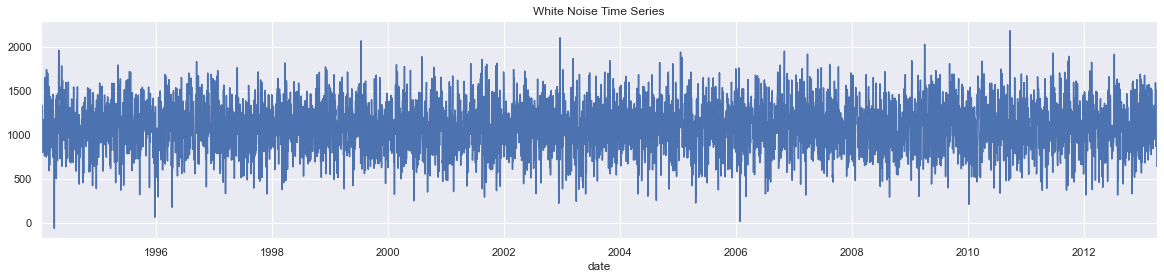

In [11]:
df.wn.plot(figsize=(20, 4), title='White Noise Time Series')
plt.show()

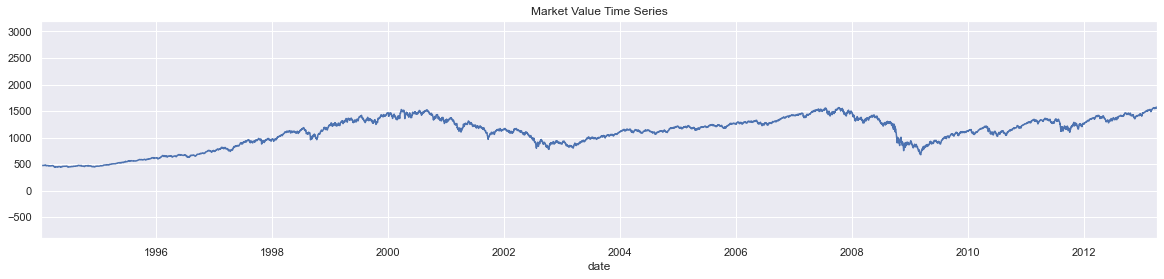

In [12]:
df.market_value.plot(figsize=(20, 4), title='Market Value Time Series')
plt.ylim((-900, 3200))
plt.show()

### Random Walk

In [13]:
rw = pd.read_csv("data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [15]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [16]:
df['rw'] = rw.price

In [17]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1081.469804,1122.139662
1994-01-10,475.27,1093.459397,1080.347860
1994-01-11,474.13,1071.300659,1082.095245
1994-01-12,474.17,1335.018964,1083.639265
1994-01-13,472.47,941.293482,1067.146255


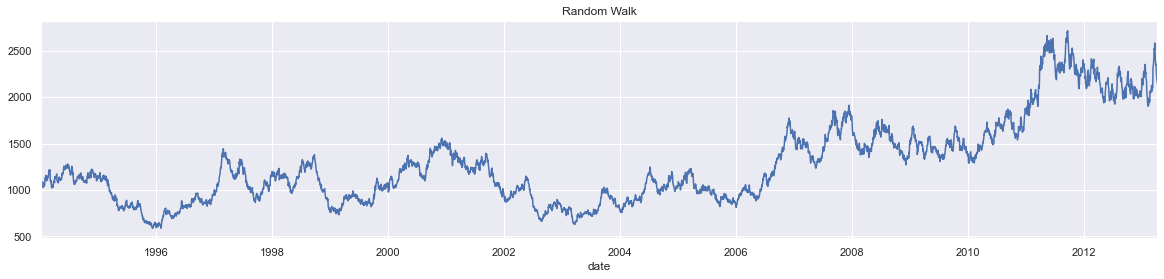

In [18]:
import datetime
df.rw.plot(figsize=(20, 4), title="Random Walk")
plt.show()

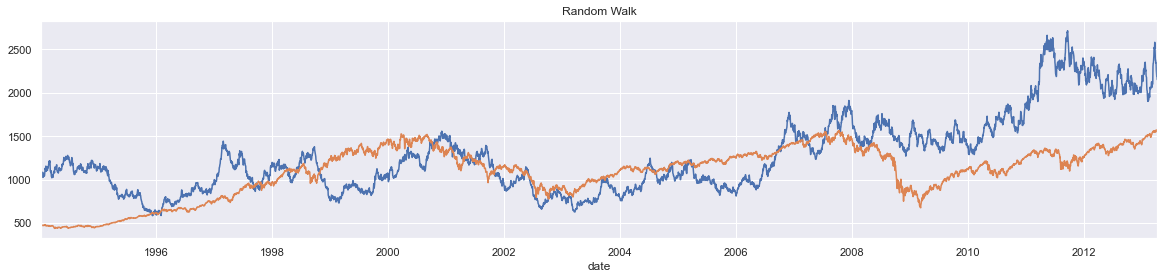

In [19]:
df.rw.plot(figsize=(20, 4), title="Random Walk")
df.market_value.plot()
plt.show()

### Stationarity

In [20]:
sts.adfuller(df.market_value)

(-1.7369847452352458,
 0.41216456967706105,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [21]:
sts.adfuller(df.wn)

(-70.71132343743507,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70627.66051175779)

In [22]:
sts.adfuller(df.rw)

(-1.328607392768973,
 0.6159849181617378,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

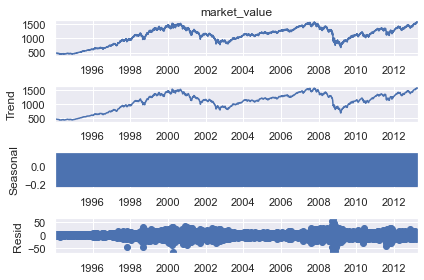

In [23]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()